# MNIST
This notebook shows sample-based explanations for individual test predictions for a tree ensemble trained on two or more classes in the MNIST dataset.

In [1]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')

from scripts import mnist

### 4s and 9s
We filter the train and test sets of MNIST to images containing either the label 4 or 9. We then train an LGB model on this two-class dataset and randomly choose a test instance to predict and explain.

train instances: 11791
test instances: 1991
labels: [4, 9]
784 to 50 using PCA...
fitting lgb...
fitting TREX...
C=0.01: 7.497s; corr=0.992
C=0.1: 7.742s; corr=1.000
C=1.0: 7.715s; corr=0.999
C=10.0: 7.841s; corr=0.996
C=100.0: 7.707s; corr=0.993


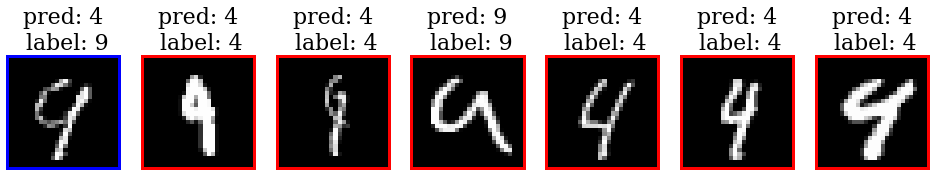

In [4]:
args = mnist.Args()
args.dataset='mnist_49'
args.tree_type='lgb'
args.tree_kernel='leaf_output'
args.kernel_model='lr'
args.topk_train=3
args.data_dir='../../data/'
args.true_label=False
mnist.main(args)

The training samples shown (red border) are samples that contribute the *most* towards the *incorrect* prediction of the test instance (blue border). The first two training samples (directly right of the test instance) are both 4's that could be miscontrued as 9s. The next sample is a 9 that takes on 4-like qualities, and the last three training samples are all 4s that look similar to the test instance. One actionable item may be to remove these potentially noisy training samples that TREX has found; or possibly remove the ambiguous looking test instance, or both. However, one may wish to keep these samples depending on the type of research they are doing.